In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split 

from google.colab import files

#Upload Files

In [ ]:
#Upload every file: dengue_features_train.csv, dengue_lables_train.csv, dengue_features_test.csv
archive = files.upload()

In [ ]:
df_features = pd.read_csv('dengue_features_train.csv', sep=',')
df_labels = pd.read_csv('dengue_labels_train.csv', sep=',')
train = pd.merge(df_features, df_labels, on=['city', 'year', 'weekofyear'])

print(train.shape)
train.head()

(1456, 25)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [ ]:
test = pd.read_csv('dengue_features_test.csv', sep=',')
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


#Pre-processing

In [ ]:
train.drop("week_start_date", axis=1, inplace=True)
test.drop("week_start_date", axis=1, inplace=True)

In [ ]:
def remove_null_values(dataframe):
  if pd.isnull(dataframe).any().any():
    dataframe.fillna(method='ffill', inplace=True)

train.apply(remove_null_values)
test.apply(remove_null_values)

print(pd.isnull(train).any().any())
print(pd.isnull(test).any().any())


False
False


In [ ]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
train['city_bin'] = lb.fit_transform(train['city'])
test['city_bin'] = lb.fit_transform(test['city'])

Divide by cities to make predictions of each one separately

In [ ]:
trainSJ = train[train['city'] == 'sj']
testSJ  = test[test['city'] == 'sj']

trainIQ = train[train['city'] == 'iq']
testIQ  = test[test['city'] == 'iq']

##Feature selection


###Tested
Linear Regression: 27.1082 ['reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent', 'station_avg_temp_c']
KNN: 30 ['reanalysis_min_air_temp_k', 'reanalysis_relative_humidty_percent', 'station_avg_temp_c']

###Selection

In [142]:
features = ['weekofyear','reanalysis_specific_humidity_g_per_kg','station_avg_temp_c','reanalysis_tdtr_k']

train_size = 80
shuffle = False

# --- Complete datasets
X_train = train[features]
X_test = test[features]
Y_train = train['total_cases']

# For testing results with MAE
X_train_sample = train[0:1201]
Y_train_sample = train['total_cases'][0:1201]
X_test_sample  = train[1201:]

# --- Complete (divided by city)
X_train_SJ = trainSJ[features]
X_test_SJ = testSJ[features]
Y_train_SJ = trainSJ['total_cases']


# For separate predictions (by city)
#trainIQ = trainIQ.reset_index()
#trainSJ = trainSJ.reset_index()
X_test_sample_SJ, X_train_sample_SJ = train_test_split(trainSJ, train_size=train_size,random_state=1, shuffle=shuffle)
Y_train_sample_SJ = train_test_split(trainSJ, train_size=train_size,random_state=1, shuffle=shuffle)
X_test_sample_IQ, X_train_sample_IQ = train_test_split(trainIQ, train_size=train_size,random_state=1, shuffle=shuffle)
Y_train_sample_IQ = train_test_split(trainIQ,train_size=train_size,random_state=1, shuffle=shuffle)

In [143]:
print("Shapes of Datasets divided by cities")
print("Total DF of SJ:", trainSJ.shape)
print(" TrainSJ:", X_train_sample_SJ.shape)
print(" Test SJ:", X_test_sample_SJ.shape)

print("Total DF of IQ:", trainIQ.shape)
print(" Train IQ:", X_train_sample_IQ.shape)
print(" Test IQ:", X_test_sample_IQ.shape)

Shapes of Datasets divided by cities
Total DF of SJ: (936, 27)
 TrainSJ: (856, 27)
 Test SJ: (80, 27)
Total DF of IQ: (520, 27)
 Train IQ: (440, 27)
 Test IQ: (80, 27)


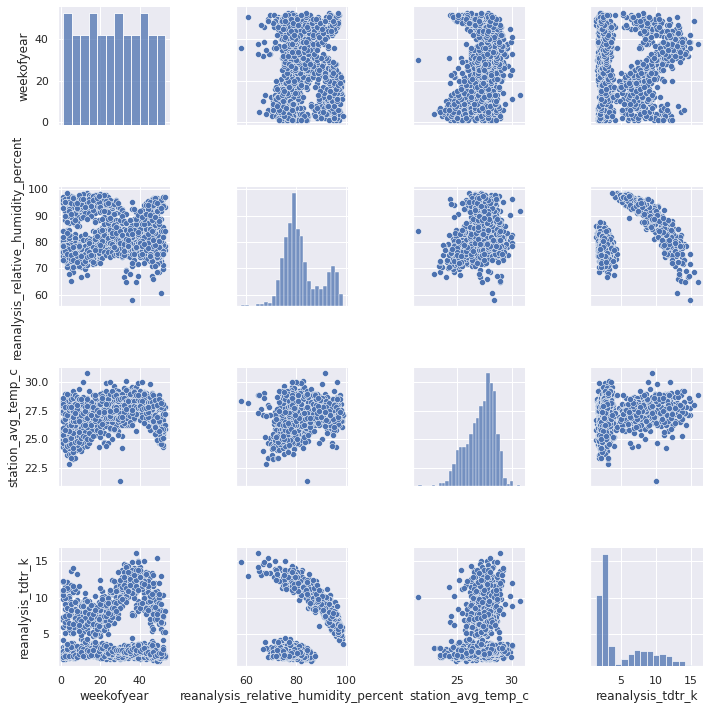

In [ ]:
%matplotlib inline
sns.pairplot(train[features]);

#Linear Regression



In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

model.coef_

array([ 0.72869611, -0.0531669 , -1.6907692 ,  7.33529116])

In [ ]:
Y_prediction = model.predict(X_test)

In [ ]:
Y = np.rint(Y_prediction)
Y = Y.astype(int)
result = np.hstack(Y)

result

array([ 18,  31,  31,  42,  34,  44,  36,  40,  40,  50,  42,  58,  44,
        48,  39,  47,  44,  45,  43,  27,  42,  25,  23,  46,  29,  33,
        43,  46,  43,  38,  35,  28,  32,  26,  20,  20,  20,  32,  25,
        26,  27,  26,  26,  18,  23,  23,  24,  21,  23,  26,  34,  25,
        27,  30,  37,  35,  38,  34,  39,  41,  41,  54,  37,  57,  44,
        39,  53,  47,  48,  59,  40,  37,  46,  35,  50,  53,  52,  43,
        46,  48,  33,  35,  34,  39,  39,  31,  33,  33,  25,  16,  29,
        35,  16,  25,  26,  25,  30,  10,  18,  26,  37,  23,  23,  31,
        34,  29,  38,  46,  39,  43,  45,  49,  35,  34,  46,  38,  33,
        30,  50,  47,  47,  46,  44,  44,  44,  48,  46,  45,  37,  44,
        39,  33,  32,  34,  32,  24,  16,  32,  21,  33,  23,  20,  27,
        19,  20,  23,  31,  28,  24,  20,  24,  19,  17,  23,  26,  30,
        34,  33,  35,  15,  17,  40,  20,  29,  26,  28,  38,  37,  30,
        46,  42,  30,  35,  39,  27,  42,  50,  29,  39,  39,  3

#Decision Trees Regression

In [189]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error


## Complete Datasets

### Heatmap with first 2 selected features

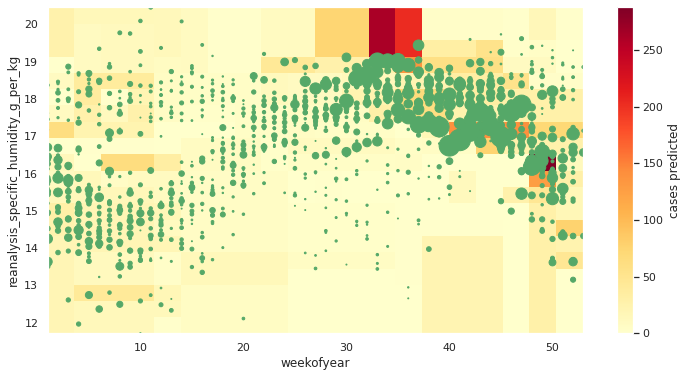

In [ ]:
regressor = DecisionTreeRegressor(criterion='mae', max_depth=10, random_state=0)

# Train
regressor.fit(train[features[0:2]],train['total_cases'])

nx = ny = 21

# Grid points
x_feature = np.linspace(train[features[0]].min(), train[features[0]].max(), nx)
y_feature = np.linspace(train[features[1]].min(), train[features[1]].max(), ny)
xx, yy = np.meshgrid(x_feature, y_feature)
z_cases = regressor.predict(np.array([xx.flatten(), yy.flatten()]).T)
zz = np.reshape(z_cases, (nx, ny))

fig = plt.figure(figsize=(12, 6))

# Plot predictions
plt.pcolormesh(x_feature, y_feature, zz, cmap=plt.cm.YlOrRd)
plt.colorbar(label='cases predicted') # add a colorbar on the right

# Plot observation
plt.scatter(train[features[0]], train[features[1]], s=train['total_cases'], c='g')

# Axis limits
plt.xlim(np.min(x_feature), np.max(x_feature))
plt.ylim(np.min(y_feature), np.max(y_feature))
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

###Subset for testing with MAE

See Mean Absolute Error value by increasing the maximum depth of the tree

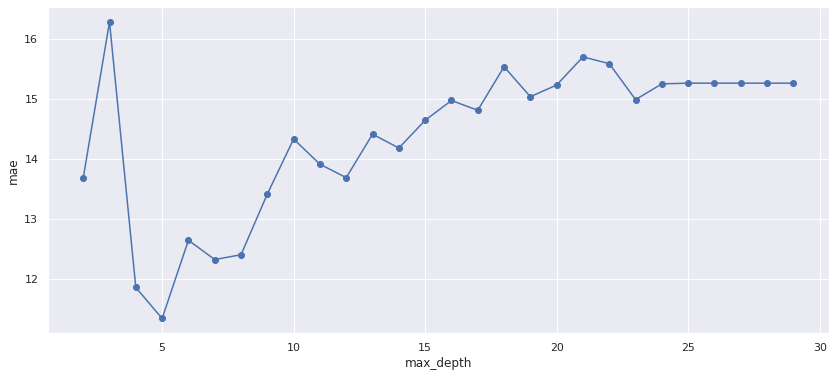

In [190]:
mae = []

for i in range(2, 30):
    regressor = DecisionTreeRegressor(criterion='mse', max_depth=i, random_state=0, splitter='best')
    regressor.fit(X_train_sample[features], X_train_sample['total_cases'])
    pred_values = regressor.predict(X_test_sample[features])
    maev = mean_absolute_error(X_test_sample['total_cases'],pred_values)
    mae.append(maev)

# Plot mae
plt.figure(figsize=(14,6))
plt.plot(range(2,30), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()

In [191]:
maxDepth = 4 # len(features) + 1

regressor = DecisionTreeRegressor(criterion='mse', max_depth=maxDepth, random_state=0, splitter='best')

# Train
regressor.fit(X_train_sample[features],X_train_sample['total_cases'])
# Predict
cases_pred = regressor.predict(np.array(X_test_sample[features]))
# Results
Y = np.rint(cases_pred); Y = Y.astype(int)
result = np.hstack(Y)
print(len(result))
result

255


array([  8,   6,   6,   6,   6,   6,  47,  47,   6,   6,   6,   6,   6,
        42,  25,  25,  25,  25,  25,  25,  42,  25,  28,  28,  28,  28,
         5,  10,   8,  15,  10,  10,  15,   8,  10,   8,  10,   8,  15,
        15,   8,   8,  15,  15,   8,  15,   8,   8,   8,   8,   8,   8,
        15,   6,   6,   6,   6,   6,   6,   6,   6,   6,  42,  25,  25,
        25,  25,  25,  25,  42,  25,  25,  25,  28,  28,  28,   5,  28,
         8,   8,   8,  15,   8,   8,   8,   8,  10,  10,   8,   8,  15,
         8,   8,   8,  15,   8,   8,  15,  15,   8,   8,   8,   8,   8,
         6,  47,   6,   6,   6,   6,   6,   6,  25,   6,  25,  25,  25,
        25,  42,  47,  42,  25,  25,  25,  25,  28,   5,  28,   5,   5,
        15,  10,  15,   8,  15,  15,  15,   8,   8,  10,   8,   8,  10,
        15,   8,  15,  15,  15,   8,   8,   8,   8,  15,  15,   8,   8,
        47,   6,   6,   6,   6,   6,   6,   6,   6,  47,  25,  25,  47,
        25,  25, 168,  25,  42,  25,  42,  47,  28,  28,   5,  2

In [ ]:
pd.DataFrame({'Attributes': features, 'Decision Tree': regressor.feature_importances_})

,Attributes,Decision Tree
0,weekofyear,0.417609
1,reanalysis_specific_humidity_g_per_kg,0.165706
2,station_avg_temp_c,0.074745
3,reanalysis_tdtr_k,0.341940


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


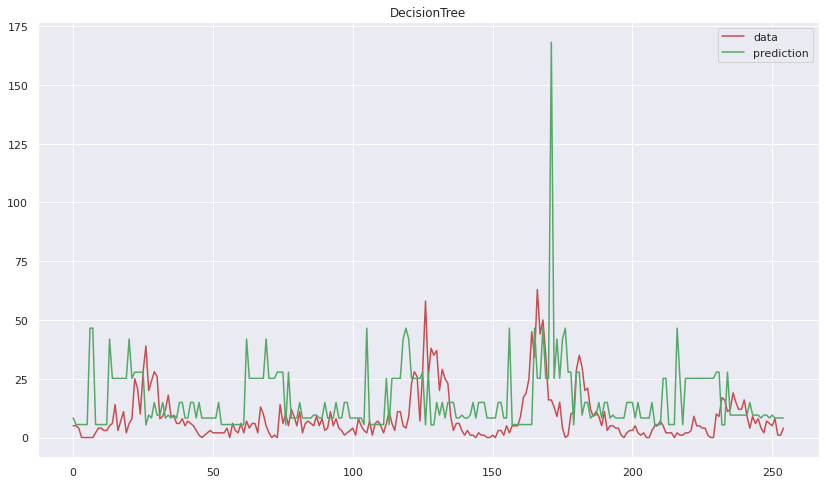

In [192]:
xx = np.stack(i for i in range(X_test_sample['total_cases'].shape[0]))
plt.figure(figsize=(14,8))
plt.plot(xx, X_test_sample['total_cases'], c='r', label='data')
plt.plot(xx, cases_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTree")

plt.show()

### Multiple heatmaps for comparations

In [ ]:
regressor = DecisionTreeRegressor(criterion='mae', max_depth=10, random_state=0)

nx = ny = 20 # This value control the number of 'lines' in result (need to be a square, 416 not possible then?)

fig, ax = plt.subplots(len(features) - 1,figsize=(12, (len(features) - 1) * 8))

print(features)
for i in range(len(features)):
  try:
    regressor.fit(train[features[i:i+2]],train['total_cases'])
    x_feature = np.linspace(train[features[i]].min(), train[features[i]].max(), nx)
    y_feature = np.linspace(train[features[i+1]].min(), train[features[i+1]].max(), ny)
    xx, yy = np.meshgrid(x_feature, y_feature)
    z_cases = regressor.predict(np.array([xx.flatten(), yy.flatten()]).T)
    zz = np.reshape(z_cases, (nx, ny))

    ax[i].pcolormesh(x_feature, y_feature, zz, cmap=plt.cm.YlOrRd) # Plot predictions
    ax[i].scatter(train[features[i]], train[features[i+1]], s=train['total_cases'], c='g') # Plot observation
    ax[i].set_xlim(np.min(x_feature), np.max(x_feature)) # Axis limits
    ax[i].set_ylim(np.min(y_feature), np.max(y_feature)) # Axis limits

    ax[i].set_xlabel(features[i])
    ax[i].set_ylabel(features[i+1])
  except: pass

In [ ]:
maxDepth = 15

nx = ny = 20 # This value control the number of 'lines' in result (need to be a square, 416 not possible then?)

fig, ax = plt.subplots(maxDepth,figsize=(12, (len(features) - 1) * 8))

print(features)
for i in range(1,15):
  try:
    regressor = DecisionTreeRegressor(criterion='mae', max_depth=i, random_state=0)
    regressor.fit(train[features[0:2]],train['total_cases'])
    x_feature = np.linspace(train[features[0]].min(), train[features[0]].max(), nx)
    y_feature = np.linspace(train[features[1]].min(), train[features[1]].max(), ny)
    xx, yy = np.meshgrid(x_feature, y_feature)
    z_cases = regressor.predict(np.array([xx.flatten(), yy.flatten()]).T)
    zz = np.reshape(z_cases, (nx, ny))

    ax[i].pcolormesh(x_feature, y_feature, zz, cmap=plt.cm.YlOrRd) # Plot predictions
    ax[i].scatter(train[features[0]], train[features[1]], s=train['total_cases'], c='g') # Plot observation
    ax[i].set_xlim(np.min(x_feature), np.max(x_feature)) # Axis limits
    ax[i].set_ylim(np.min(y_feature), np.max(y_feature)) # Axis limits

    ax[i].set_xlabel(features[0])
    ax[i].set_ylabel(features[1])
  except: pass

In [ ]:
pd.DataFrame({'Attributes': features, 'Decision Tree': regressor.feature_importances_})

,Attributes,Decision Tree
0,reanalysis_specific_humidity_g_per_kg,0.212587
1,precipitation_amt_mm,0.065336
2,station_max_temp_c,0.042106
3,station_min_temp_c,0.063896
4,ndvi_se,0.616075


## Divided by cities

#### IQ

#####Complete

In [357]:
features = ['weekofyear', 'ndvi_sw', 'reanalysis_specific_humidity_g_per_kg', 'station_min_temp_c']

X_train_SJ = trainSJ[features]
X_test_SJ = testSJ[features]
Y_train_SJ = trainSJ['total_cases']

In [362]:
maxDepth = len(features)

regressor = DecisionTreeRegressor(criterion='mse', max_depth=maxDepth, random_state=0, splitter='best')

# Train
regressor.fit(trainSJ[features],trainSJ['total_cases'])
# Predict
cases_pred_iq = regressor.predict(np.array(X_test_SJ[features]))
# Results
Y = np.rint(cases_pred_iq); Y = Y.astype(int)
result_total_iq = np.hstack(Y)
print(len(result_total_iq))
result_total_iq

260


array([ 14,  14,  14,  14,  14,  14,  14,  14,  14,  14,  14,  29,  29,
        41,  49,  41,  49,  49, 229,  66,  49,  29,  29,  49,  41,  29,
        41,  41,  41,  41,  49,  41,  29,  29,  41,  22,  22,  22,  22,
        36,  14,  14,  14,  14,  14,  14,  14,  14,  14,  14,  14,  14,
        14,  14,  14,  14,  14,  14,  14,  14,  14,  14,  14,  29,  60,
        41,  41,  41,  49,  49,  41,  41,  41,  41,  41,  49,  29,  49,
        49,  41,  41,  41,  41,  49,  41,  49,  41,  41,  36,  36,  66,
        36,  35,  14,  14,  14,  14,  14,  14,  14,  14,  14,  14,  14,
        14,  14,  14,  14,  14,  20,  60,  60,  20,  20,  60,  60,  20,
        20,  49, 229,  66,  49, 229, 229,  77,  41,  41,  66,  77,  29,
        49,  41,  41,  41,  49,  41,  49,  49,  41,  41,  22,  66,  36,
        22,  22,  14,  14,  14,  14,  14,  14,  14,  14,  14,  14,  14,
        14,  14,  14,  14,  14,  14,  14,  60,  60,  20,  20,  60,  29,
        60,  49,  49,  49, 229,  66,  41,  66,  41,  29,  29,  4

In [363]:
pd.DataFrame({'Attributes': features, 'Decision Tree': regressor.feature_importances_})

,Attributes,Decision Tree
0,weekofyear,0.270806
1,ndvi_sw,0.662591
2,reanalysis_specific_humidity_g_per_kg,0.064946
3,station_min_temp_c,0.001658


#####With sample

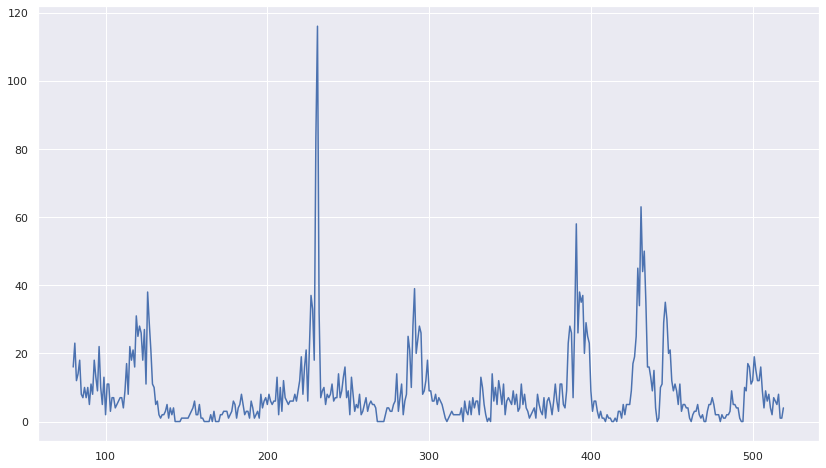

In [144]:
if not shuffle:
  plt.figure(figsize=(14,8))
  X_train_sample_IQ['total_cases'].plot()

In [145]:
# Selected features for IQ
features = ['weekofyear','station_min_temp_c','reanalysis_specific_humidity_g_per_kg']

In [146]:
maxDepth = len(features) + 1

regressor = DecisionTreeRegressor(criterion='mse', max_depth=maxDepth, random_state=0, splitter='best')

# Train
regressor.fit(X_train_sample_IQ[features],X_train_sample_IQ['total_cases'])
# Predict
cases_pred_iq = regressor.predict(np.array(X_test_sample_IQ[features]))
# Results
Y = np.rint(cases_pred); Y = Y.astype(int)
result = np.hstack(Y)
print(len(result))
result

440


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  2,
       11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        2, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  2, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


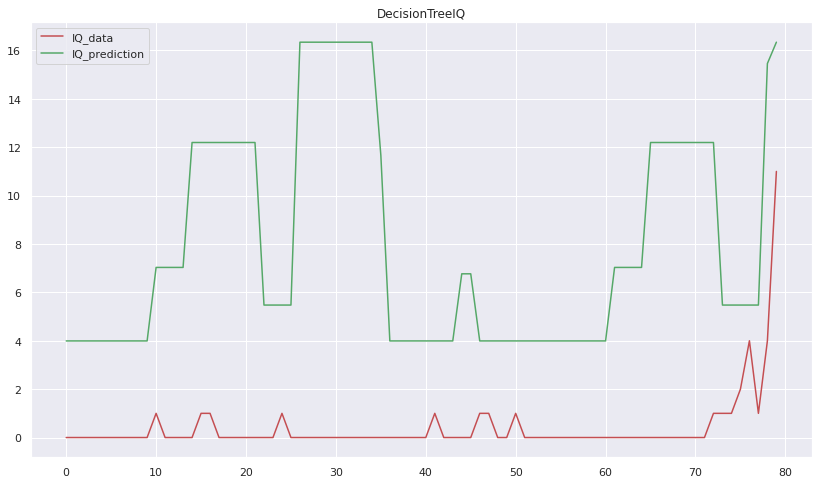

In [147]:
xx = np.stack(i for i in range(X_test_sample_IQ['total_cases'].shape[0]))
plt.figure(figsize=(14,8))
plt.plot(xx, X_test_sample_IQ['total_cases'], c='r', label='IQ_data')
plt.plot(xx, cases_pred_iq, c='g', label='IQ_prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTreeIQ")

plt.show()

#### SJ

#####Complete

In [ ]:
plt.figure(figsize=(14,8))
trainIQ['total_cases'].plot()

In [341]:
features = ['weekofyear', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_precip_amt_kg_per_m2']

X_train_IQ = trainIQ[features]
X_test_IQ = testIQ[features]
Y_train_IQ = trainIQ['total_cases']

In [344]:
maxDepth = len(features) + 1

regressor = DecisionTreeRegressor(criterion='mse', max_depth=maxDepth, random_state=0, splitter='best')

# Train
regressor.fit(trainIQ[features],trainIQ['total_cases'])
# Predict
cases_pred = regressor.predict(np.array(X_test_IQ[features]))
# Results
Y = np.rint(cases_pred); Y = Y.astype(int)
result_total_sj = np.hstack(Y)
print(len(result_total_sj))
result_total_sj

156


array([ 4,  4,  7,  4,  4,  4,  4,  4,  4,  4,  4,  4, 15,  5, 15,  5,  7,
       12, 12, 12, 12, 12, 12, 12, 17,  5, 15, 22,  8,  8,  4,  8, 16, 16,
       16, 16,  7,  7,  7,  7,  7,  7,  7,  7,  7,  4,  4,  4,  4,  4,  1,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 15, 15,  5,  7,
        6, 12,  5, 12, 12, 12, 48, 12, 12, 12, 12, 10, 10,  8, 22, 16, 16,
        8, 22, 22,  7,  4,  1,  7,  1,  7,  7,  7,  7,  4,  7,  4,  4,  4,
        4,  4,  1,  4,  4,  1,  4,  4,  4,  4,  1,  4,  4,  4,  5, 15,  5,
        7,  5, 12, 12, 17, 12, 12, 12, 48, 12, 12, 10, 22, 22, 16,  8, 16,
       16, 16, 16,  7,  7,  7,  7,  7,  7,  7,  7,  4,  7,  7,  1,  4,  4,
        4,  4,  4])

In [345]:
pd.DataFrame({'Attributes': features, 'Decision Tree': regressor.feature_importances_})

,Attributes,Decision Tree
0,weekofyear,0.368885
1,reanalysis_specific_humidity_g_per_kg,0.378042
2,reanalysis_precip_amt_kg_per_m2,0.253073


#####With sample

In [148]:
X_train_sample_SJ

,level_0,index,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_bin
80,80,80,sj,1991,46,0.095400,0.111400,0.194943,0.198057,78.73,298.685714,298.785714,295.615714,301.0,297.4,72.70,83.514286,78.73,17.061429,1.971429,26.657143,6.742857,31.1,22.2,28.2,127,1
81,81,81,sj,1991,47,0.008250,0.028425,0.138743,0.179643,0.00,298.698571,298.707143,294.030000,300.8,297.1,15.10,75.548571,0.00,15.460000,2.271429,26.314286,6.814286,30.0,22.2,9.4,129,1
82,82,82,sj,1991,48,0.087867,0.151900,0.179629,0.166186,35.34,298.375714,298.500000,294.938571,301.1,296.9,78.43,81.485714,35.34,16.322857,2.028571,26.271429,6.585714,30.0,22.2,76.2,169,1
83,83,83,sj,1991,49,0.080200,0.140250,0.133629,0.134457,0.00,298.642857,298.842857,294.974286,300.5,297.7,35.10,80.275714,0.00,16.340000,1.800000,26.728571,6.057143,30.6,23.3,19.6,141,1
84,84,84,sj,1991,50,-0.026650,0.212800,0.222414,0.228943,0.00,298.518571,298.592857,294.514286,300.2,297.3,26.80,78.621429,0.00,15.884286,2.014286,25.614286,5.857143,29.4,21.7,34.2,108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,931,931,sj,2008,13,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4,1
932,932,932,sj,2008,14,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3,1
933,933,933,sj,2008,15,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1,1
934,934,934,sj,2008,16,0.001800,-0.052750,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3,1


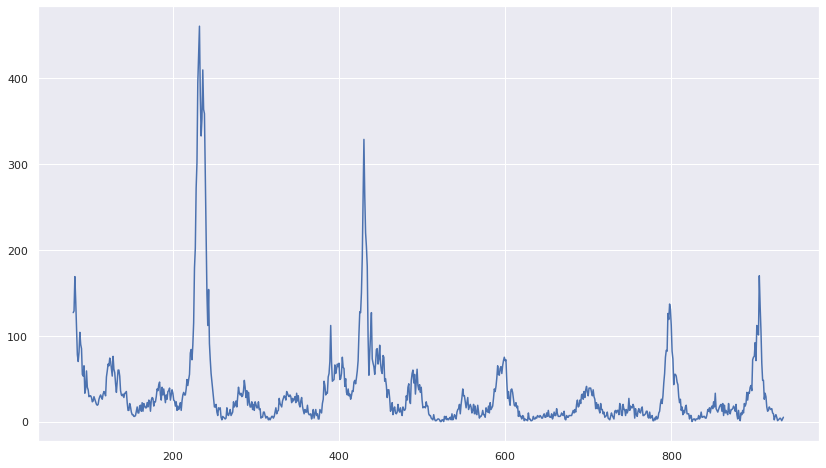

In [149]:
if not shuffle:
  plt.figure(figsize=(14,8))
  X_train_sample_SJ['total_cases'].plot()

In [153]:
# Selected features for SJ
features = ['weekofyear','station_min_temp_c','reanalysis_specific_humidity_g_per_kg']

In [167]:
maxDepth = len(features) + 1

regressor = DecisionTreeRegressor(criterion='mse', max_depth=maxDepth, random_state=0, splitter='best')

# Train
regressor.fit(X_train_sample_SJ[features],X_train_sample_SJ['total_cases'])
# Predict
cases_pred_SJ = regressor.predict(np.array(X_test_sample_SJ[features]))
# Results
Y = np.rint(cases_pred_SJ); Y = Y.astype(int)
result = np.hstack(Y)
print(len(result))
result

80


array([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 59, 59, 59, 59,
       59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 40, 40, 40,
       40, 30, 30, 30, 30, 30, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 59, 59, 59,
       59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


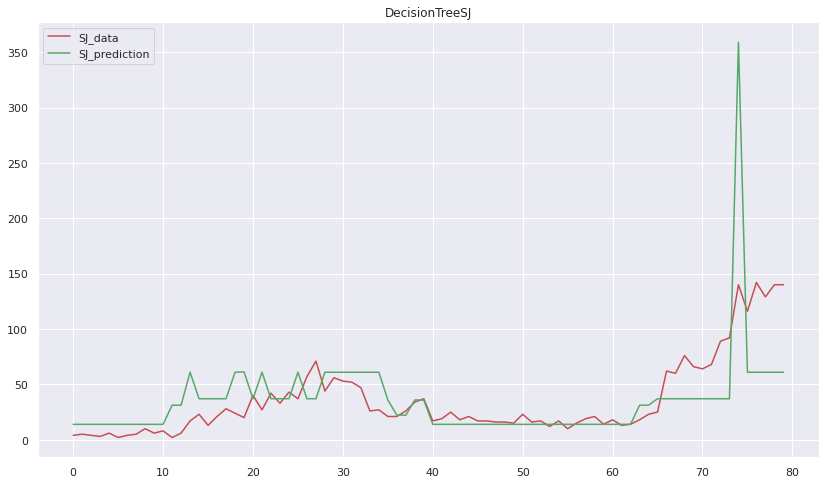

In [155]:
xx = np.stack(i for i in range(X_test_sample_SJ['total_cases'].shape[0]))
plt.figure(figsize=(14,8))
plt.plot(xx, X_test_sample_SJ['total_cases'], c='r', label='SJ_data')
plt.plot(xx, cases_pred_SJ, c='g', label='SJ_prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTreeSJ")

plt.show()

####Merge cities dataframes in one dataframe

In [346]:
result = np.append(result_total_iq, result_total_sj)
result

array([ 11,  11,  11,  11,  11,  11,  11,  11,  22,  22,  22,  22,  22,
        72,  36,  72,  36,  49,  55,  51,  49,  26,  36,  49,  51,  36,
        51,  51,  51,  51,  36,  51,  36,  36,  22,  53,  27,  17,  20,
        20,  15,  21,  15,  21,  15,  11,  11,  11,  11,  11,  11,  11,
        11,  11,  11,  11,  11,  11,  14,  14,  22,  80,  22,  22,  22,
        55,  55,  55,  36,  36,  55,  51,  22,  51,  55,  36,  36,  36,
        36,  51,  51,  51,  51,  58,  11,  36,  22,  22,  53,  53,  20,
        27,  17,  21,  21,  22,  15,  22,  11,  11,  14,  11,  11,  11,
        14,  14,  14,  14,  14,  14,  16,  16,  14,  22,  22,  22, 191,
        22,  36,  55,  55,  49, 176,  55, 176,  55,  55,  55,  55,  36,
        58,  51,  38,  22,  36,  51,  58,  49,  22,  22,  30,  17,  27,
        27,  27,  15,  15,  15,  21,  15,  11,  11,  11,  11,  11,  11,
        11,  11,  11,  11,  11,  14,  14,  14,  49,  22,  22,  22,  22,
        22,  49,  36,  49,  35,  55,  55,  55,  51,  36,  58,  5

#kNN Regression

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [ ]:
cv = KFold(n_splits = 10, shuffle = False)

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(train):
          # División train test aleatoria
          f_train = train.loc[train_fold]
          f_test = train.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit(X = f_train.drop(['total_cases','city'], axis=1), y = f_train['total_cases'])
          y_pred = knn.predict(X = f_test.drop(['total_cases','city'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['total_cases'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

In [ ]:
# constructor
n_neighbors = 11
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 
# fit and predict

knn.fit(X = train.drop(['total_cases','city'], axis=1), y = train['total_cases'])
y_pred = knn.predict(X = test.drop(['city'], axis = 1))
#mae = mean_absolute_error(test['total_cases'], y_pred)
#print ('MAE', mae)

In [ ]:
Y = np.rint(y_pred)
Y = Y.astype(int)
result = np.hstack(Y)

print(len(result))
result

#Generate Output

In [347]:
# generate output
output = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 'total_cases': result})


from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,city,year,weekofyear,total_cases
0,sj,2008,18,11
1,sj,2008,19,11
2,sj,2008,20,11
3,sj,2008,21,11
4,sj,2008,22,11
